# RANDOM FOREST CLASSIFICATION

# Importing Modules and DataFrame

In [66]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(0)

df1 = pd.read_csv("Worksheet in Project Topics for SS 2019.csv")
df1 = df1.replace({'yes':1,'no':0})
df1.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


# Random Forest Without Feature Extraction

In [67]:
df1.corr().loc[:,'card']

card           1.000000
reports       -0.452577
age            0.000537
income         0.094308
share          0.388028
expenditure    0.365814
owner          0.147826
selfemp       -0.054340
dependents    -0.036126
months        -0.000268
majorcards     0.107769
active         0.080464
Name: card, dtype: float64

In [68]:
X1 = df1.drop('card',axis=1)
X1.head()

# DataFrame of Independent Variables

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [69]:
y1 = df1.card
y1.head()

# Target Variable

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64

In [70]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=101)

In [71]:
rnd1 = RandomForestClassifier(n_jobs=2,random_state=0)
rnd1.fit(X1_train,y1_train)

score1 = rnd1.score(X1_train,y1_train)*100
print ("\nScore:",score1)

/home/ujaan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Score: 99.79777553083923


In [72]:
pred1 = rnd1.predict(X1_test)
pred1[:5]

array([1, 1, 1, 1, 1])

In [73]:
pred_proba1 = rnd1.predict_proba(X1_test)
pred_proba1[:5]

array([[0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [74]:
pd.crosstab(index=y1_test,columns=pred1,rownames = ["Actual Value"],
           colnames = ["Predicted Value"])

Predicted Value,0,1
Actual Value,,
0,64,0
1,9,257


In [75]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(metrics.classification_report(y1_test,pred1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        64
           1       1.00      0.97      0.98       266

   micro avg       0.97      0.97      0.97       330
   macro avg       0.94      0.98      0.96       330
weighted avg       0.98      0.97      0.97       330



In [76]:
accuracy_rnd1 = metrics.accuracy_score(y1_test,pred1)*100
print("Accurate Score of this model: %2.5f"%accuracy_rnd1)

Accurate Score of this model: 97.27273


In [79]:
print("MAE: ", metrics.mean_absolute_error(y1_test,pred1))
print("MSE: ",metrics.mean_squared_error(y1_test,pred1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y1_test,pred1)))

MAE:  0.02727272727272727
MSE:  0.02727272727272727
RMSE:  0.1651445647689541


In [81]:
# view a list of the features and their importance scores
list(zip(X1_train,rnd1.feature_importances_))

[('reports', 0.08238557190146253),
 ('age', 0.02206311387499043),
 ('income', 0.032886573322680315),
 ('share', 0.5272706402701804),
 ('expenditure', 0.26469171570402655),
 ('owner', 0.0064042191414861475),
 ('selfemp', 0.003500615717335109),
 ('dependents', 0.013451978914425265),
 ('months', 0.017474498207060173),
 ('majorcards', 0.007222305946972882),
 ('active', 0.022648766999380236)]

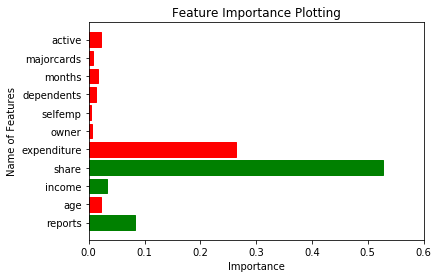

In [82]:
feature_list = list(df1.columns)
feature_list.remove('card')
importance_list = [0.08238557190146253,0.02206311387499043,0.032886573322680315,0.5272706402701804,0.26469171570402655,
                   0.0064042191414861475,0.003500615717335109,0.013451978914425265,0.017474498207060173,
                   0.007222305946972882,0.022648766999380236]

plt.xlabel('Importance')
plt.ylabel('Name of Features')
plt.title("Feature Importance Plotting")

barlist = plt.barh(feature_list, importance_list)
plt.xlim([0,0.6])

barlist[0].set_color('g')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('g')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
barlist[10].set_color('r')

plt.show()

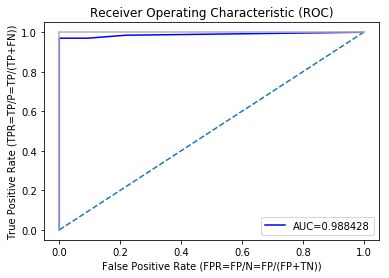

In [83]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

y1_score = rnd1.predict_proba(X1_test)[:,1]
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y1_test, y1_score)

# Plot ROC curve
roc_auc = metrics.auc(false_positive_rate,true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")

plt.legend(loc='lower right')

plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

# Random Forest With Feature Extraction

In [84]:
df2 = pd.read_csv('Pre-processed Data.csv')
df2.head()

,card,reports,income,share
0,1,0,4.5200,0.033270
1,1,0,2.4200,0.005217
2,1,0,4.5000,0.004156
3,1,0,2.5400,0.065214
4,1,0,9.7867,0.067051


In [85]:
df2.corr()

,card,reports,income,share
card,1.000000,-0.452577,0.094308,0.388028
reports,-0.452577,1.000000,0.011023,-0.159011
income,0.094308,0.011023,1.000000,-0.054429
share,0.388028,-0.159011,-0.054429,1.000000


In [86]:
X2 = df2.drop('card',axis=1)
X2.head()

# Indpendent Variabales

,reports,income,share
0,0,4.5200,0.033270
1,0,2.4200,0.005217
2,0,4.5000,0.004156
3,0,2.5400,0.065214
4,0,9.7867,0.067051


In [87]:
y2 = df2.card
y2.head()

# Target Variable

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64

In [88]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

In [89]:
rnd2 = RandomForestClassifier(n_jobs=2,random_state=0)
rnd2.fit(X2_train,y2_train)

score2 = rnd2.score(X2_train,y2_train)*100
print ("\nScore:",score2)

/home/ujaan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Score: 99.19110212335693


In [90]:
pred2 = rnd2.predict(X2_test)
pred2[0:5]

array([1, 1, 1, 1, 1])

In [91]:
pred_proba2 = rnd2.predict_proba(X2_test)
pred_proba2[:5]

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9]])

In [92]:
pd.crosstab(index=y2_test,columns=pred2,rownames = ["Actual Value"],
           colnames = ["Predicted Value"])

Predicted Value,0,1
Actual Value,,
0,60,4
1,9,257


In [93]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(metrics.classification_report(y2_test,pred2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        64
           1       0.98      0.97      0.98       266

   micro avg       0.96      0.96      0.96       330
   macro avg       0.93      0.95      0.94       330
weighted avg       0.96      0.96      0.96       330



In [94]:
accuracy_rnd2 = metrics.accuracy_score(y2_test,pred2)*100
print("Accurate Score of this model: %2.5f"%accuracy_rnd2)

Accurate Score of this model: 96.06061


In [97]:
print("MAE: ", metrics.mean_absolute_error(y2_test,pred2))
print("MSE: ",metrics.mean_squared_error(y2_test,pred2))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y2_test,pred2)))

MAE:  0.03939393939393939
MSE:  0.03939393939393939
RMSE:  0.19847906537954926


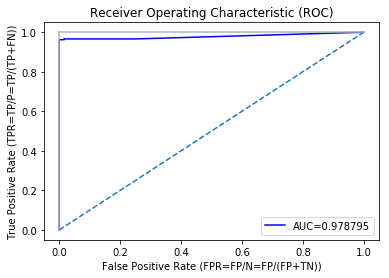

In [99]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

y2_score = rnd2.predict_proba(X2_test)[:,1]
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y2_test, y2_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc = metrics.auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()